Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

## PEC00025: Introdução à Teoria das Vibrações


### Trabalho 1

#### Aluna: Gabriela Penna Bianchin
#### Cartão: 00312316


[1.   Introdução](#section_1)  
[2.   Obtenção de dados](#section_2)  
[3.   Cálculo dos deslocamentos - Método de Duhamel](#section_3)   
[4.   Gráfico - Espectro de Pseudoaceleração](#section_4)  
[5.   Gráfico - Periodograma](#section_5)  
[6.   Considerações Finais](#section_6)  

 


In [2]:
# Importação de bibliotecas necessárias para realização deste trabalho

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy



### 1. Introdução <a name="section_1"></a> 

A fim de se obter gráficos de resposta para um sistema com um grau de liberdade (SDOF), foi necessário analisar os dados a partir de uma excitação na base. Neste trabalho os objetivo são desenvolver o espectro de pseudoaceleração, bem como o periodograma do sistema. 
Para obtenção de resultados foi necessário recolher dados através de um aplicativo para celular, denominado "bosch iNVH". Realizou-se um posicionamento em uma base sujeita a uma vibração.
A seguir serão apresentados os dados e as características do sistema fictício, bem como o desenvolvimento dos gráficos.




In [3]:
m = 1.0 # massa do sistema em kg
fn = np.linspace (0.1,15,1500) #Frequência natural em Hz, variando para um intervalo
Tn = 1/fn #Período de oscilação
zt = 0.01 #Amortecimento adotado

#Condições Iniciais:

u0 = 0. #Deslocamento incial
v0 = 0. #Velocidade incials


### 2. Obtenção de Dados <a name="section_2"></a> 

A captação dos dados das acelerações nos eixos foi realizada através do aplicativo de celular. O programa mediu a aceleração em um motor de carro, quando este estava ligado. Após a medição foi exportado um arquivo com extensão ".csv" que será interpretado pela classe MRPy, desenvolvida pelo Prof. Dr. Marcelo M. Rocha.



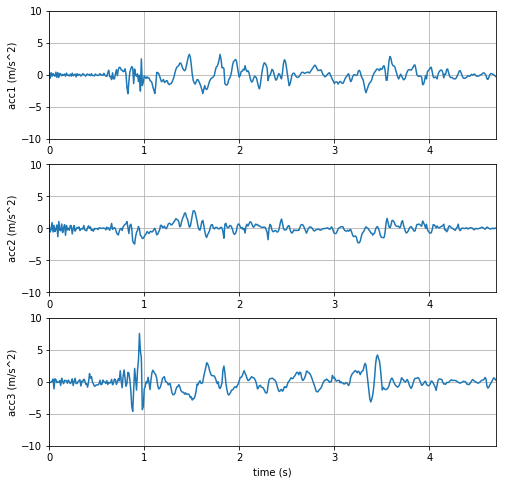

In [5]:
data = MRPy.from_file('data/iNVH001', form='invh').zero_mean() # Importação dos Dados coletados
t    = data.t_axis()

plt.figure(1, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-10, 10);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');




No entanto, apenas a aceleração na direção z (vertical) é necessária, para se obter a vibração, então:




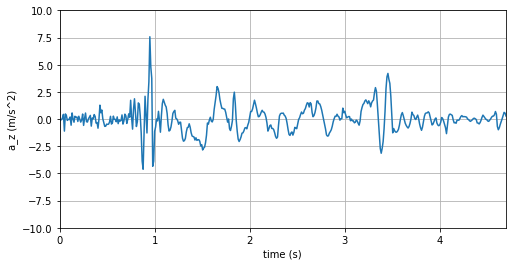

In [6]:
az = MRPy(data[2], data.fs)  # Aceleração no eixo vertical (z)
t  = az.t_axis()

plt.figure(2, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-10, 10);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 



### 3. Cálculo dos deslocamentos - Método de Duhamel <a name="section_3"></a> 

O método apresenta uma solução para um sistema que está sob ação de uma excitação externa. A equação a seguir apresenta a forma geral para a solução de um sistema amortecido sujeito a vibração forçada:

$$ u(t) = u_0(t) + \frac{1}{m \omega_{\rm D}} 
                   \int_0^t \exp \left[ -\zeta\omega_{\rm n}(t - \tau) \right] \;
                   \sin \omega_{\rm D} (t - \tau) \; F(\tau) \; d\tau $$

A resolução desta equação está associada à biblioteca MRPy e é observada a seguir:

In [7]:
umax = np.zeros(fn.shape) #Vetor criado deve ter mesmo tamanho de fn

for k, f in enumerate (fn):
    
    u_Dx = az.sdof_Duhamel(f,zt,u0,v0)/m #Loop para receber os valores máximos
    umax[k] = u_Dx.max()
    
wn = (2*np.pi*fn) # Cálculo da Frequência 


### 4. Gráfico - Espectro de Pseudoaceleração <a name="section_4"></a> 

Este gráfico representa a plotagem das acelerações de pico no período, onde variam a partir das diferentes frequências. A aceleração de pico pode ser definida conforme a equação:

$$ a  pico = \omega^2 u * u max  $$

Esse tipo de aceleração vale para impactos de curta duração e indicam apenas os valores máximos, sem considerar o tempo.


aceleração de pico máxima: 25.27661207837365


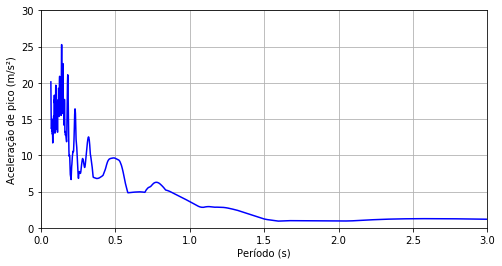

In [8]:
apico = wn*wn*umax


plt.figure(3, figsize=(8, 4), clear=True)
plt.plot(Tn, apico, 'b')

plt.xlim(0, 3);   
plt.xlabel('Período (s)') 
plt.ylim(0,30);   
plt.ylabel('Aceleração de pico (m/s²)') 

plt.grid(True)

print('aceleração de pico máxima:', max(apico))



### 5. Gráfico - Periodograma <a name="section_5"></a> 

Esse gráfico permite a observação da frequência que possui a maior energia, ou seja, obter a frequência que se aproxima mais da frequência natural de vibração do sistema. A partir da classe MRPy, pode-se obter a plotagem dos dados coletados.

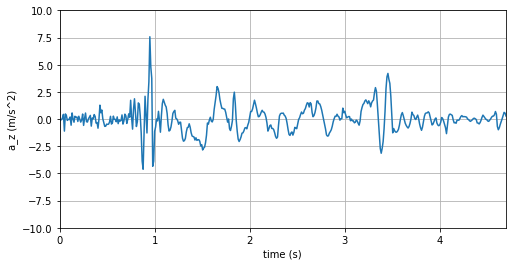

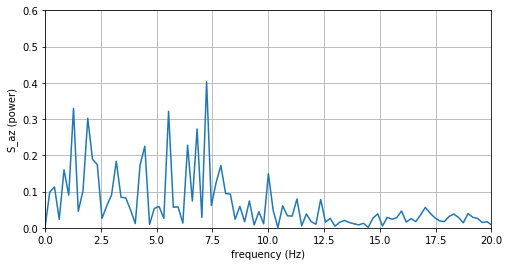

In [9]:
plt.figure(4, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  
plt.xlabel('time (s)') 
plt.ylim(-10, 10);   
plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 


Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0])

plt.xlim(0, 20);   
plt.xlabel('frequency (Hz)') 
plt.ylim(0, 0.6);   
plt.ylabel('S_az (power)') 

plt.grid(True)

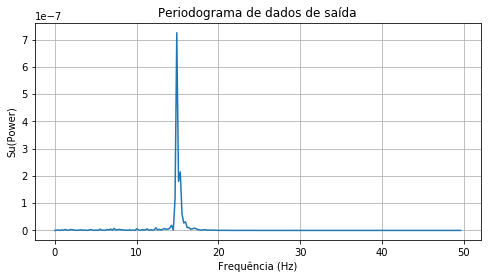

In [18]:
Su_Dx, fs = u_Dx.periodogram()
f= u_Dx.f_axis()

plt.figure(6, figsize=(8,4), clear = True);
plt.title("Periodograma de dados de saída");
plt.plot(f,Su_Dx[0])


plt.xlabel('Frequência (Hz)')
plt.ylabel('Su(Power)')

plt.grid(True)


### 6. Considerações Finais <a name="section_6"></a> 

Depois de importar os dados do aplicativo, foi considerado apenas a componente z da aceleração (vertical), indicando que o sistema apresenta apenas um grau de liberdade (SDOF). A analise dessa componente, bem como o cálculo dos deslocamentos na direção vertical foram realizados através do método de Duhamel presente na classe MRPy. Para isso foi suposto 1500 valores de frequência natural, variando no intervalo de 0.1 Hz até 15 Hz. 
Os valores de pico de aceleração foram calculados, a fim de confeccionar o espectro de pseudoacelerações.
Utilizando as mesmas acelerações foi possível plotar o periodograma desse sistema, que indica a frequência que mais se aproxima da natural de vibração do sistema.